In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm import notebook

## Data Loading

In [3]:
import torchvision 
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog','frog', 'horses', 'ship', 'truck')

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 4, shuffle= True)

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
2


## Visulaise Data

In [6]:
img = images[0]
print(type(img))


<class 'torch.Tensor'>


In [7]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [8]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


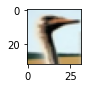

In [9]:
plt.figure(figsize=(1,1))
plt.imshow(npimg)
plt.show()

In [10]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(img,(1,2,0)))
    plt.show()

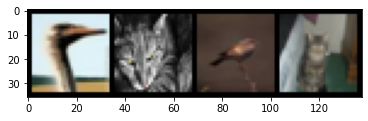

bird cat bird cat


In [11]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convulation Layer

In [5]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16,3, padding=(1,1), stride=(2,2))
    def forward(self, x):
        x = self.conv1(x)
        return x

In [13]:
net = FirstCNN()

In [14]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [15]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [16]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


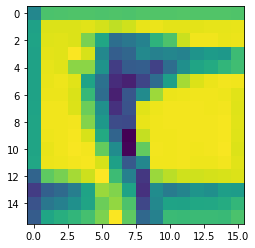

In [17]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

## Deep Convulional Network

In [18]:
class FirstCNN_v2(nn.Module):
    def __init__(self):
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3),
            nn.Conv2d(8, 16, 3)
        )
    def forward(self, x):
        x = self.model(x)
        return x

In [19]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

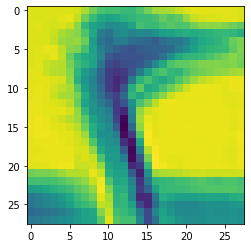

In [20]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [21]:
class FirstCNN_v3(nn.Module):
    def __init__(self):
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5), #(N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2), #(N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5), #(N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2) #(N, 16, 10, 10) -> (N, 16, 5, 5)
        )
    def forward(self, x):
        x = self.model(x)
        return x

In [22]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

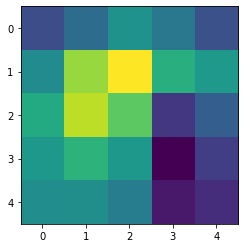

In [23]:
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

In [24]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5), #(N,3,32,32) -> (N, 6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride = 2), #(N, 6, 28,28) -> (N, 6, 14, 14)

            nn.Conv2d(6,16,5), #(N, 6, 14, 14) -> (N,16,10,10)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2) #(N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400, 120),
            nn.Tanh(),
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84,10)
        )

    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [25]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [26]:
print(out)

tensor([[ 0.1071,  0.0647,  0.0536,  0.1714,  0.0050,  0.1020, -0.0311,  0.0840,
          0.0042,  0.1740],
        [ 0.0916,  0.0318,  0.0638,  0.1826, -0.0066,  0.1119, -0.0516,  0.0760,
          0.0043,  0.1190],
        [ 0.1036,  0.0131,  0.0656,  0.1752, -0.0039,  0.0917, -0.0648,  0.0637,
         -0.0076,  0.1378],
        [ 0.0807,  0.0327,  0.0779,  0.1675, -0.0095,  0.0929, -0.0506,  0.0785,
          0.0041,  0.1307]], grad_fn=<AddmmBackward>)


In [27]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([9, 3, 3, 3])


## Training LeNet

In [47]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5), #(N,3,32,32) -> (N, 6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride = 2), #(N, 6, 28,28) -> (N, 6, 14, 14)

            nn.Conv2d(6,16,5), #(N, 6, 14, 14) -> (N,16,10,10)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2) #(N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400, 120),
            nn.Tanh(),
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84,10)
        )

    def forward(self, x):
        #print(x.shape)
        x = self.cnn_model(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        #print(x.shape)
        x = self.fc_model(x)
        #print(x.shape)
        return x

In [29]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [30]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader: 
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [31]:
net  = LeNet()

In [46]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())


Epoch: 0/16, Test acc: 37.64, Train acc: 38.06
Epoch: 1/16, Test acc: 43.76, Train acc: 43.35
Epoch: 2/16, Test acc: 45.43, Train acc: 46.04
Epoch: 3/16, Test acc: 48.77, Train acc: 49.86
Epoch: 4/16, Test acc: 51.98, Train acc: 53.21
Epoch: 5/16, Test acc: 51.80, Train acc: 54.72
Epoch: 6/16, Test acc: 52.89, Train acc: 56.49
Epoch: 7/16, Test acc: 54.08, Train acc: 57.93
Epoch: 8/16, Test acc: 54.03, Train acc: 58.20
Epoch: 9/16, Test acc: 53.10, Train acc: 58.60
Epoch: 10/16, Test acc: 54.16, Train acc: 60.98
Epoch: 11/16, Test acc: 55.07, Train acc: 61.82
Epoch: 12/16, Test acc: 54.42, Train acc: 61.88
Epoch: 13/16, Test acc: 55.21, Train acc: 63.03
Epoch: 14/16, Test acc: 55.16, Train acc: 63.55
Epoch: 15/16, Test acc: 55.02, Train acc: 64.05



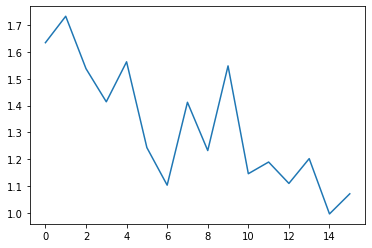

Wall time: 7min 45s


In [33]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in notebook.tqdm(range(max_epochs), total=max_epochs, unit="epoch"):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        opt.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        opt.step()

        loss_arr.append(loss.item())
    loss_epoch_arr.append(loss.item())
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show() 

## Move to GPU

In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [35]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [36]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [37]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in notebook.tqdm(range(max_epochs), total=max_epochs, unit="epoch"):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        opt.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        opt.step()


Wall time: 2min 18s


In [38]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 56.01, Train acc: 66.18


## Basic Visulaization

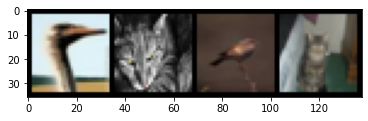

In [39]:
imshow(torchvision.utils.make_grid(images))

In [40]:
net = net.to('cpu')

In [41]:
out = net(images)


In [42]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

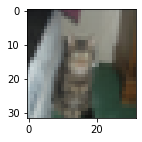

In [43]:
image_id = 3
plt.figure(figsize=(2,2))
imshow(images[image_id])

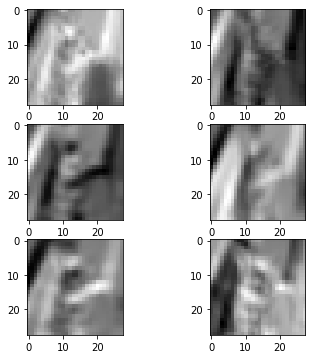

In [44]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()

## Exercises

Using L2 Regularization to fix Overfitting in the network 

In [12]:
class LeNet_v1(nn.Module):
    def __init__(self):
        super(LeNet_v1, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5), #(N,3,32,32) -> (N, 6, 28, 28)
            nn.LeakyReLU(),
            nn.AvgPool2d(2, stride = 2), #(N, 6, 28,28) -> (N, 6, 14, 14)

            nn.Conv2d(6,16,5), #(N, 6, 14, 14) -> (N,16,10,10)
            nn.LeakyReLU(),
            nn.AvgPool2d(2, stride=2) #(N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400, 120),
            nn.LeakyReLU(),
            nn.Linear(120, 84),
            nn.LeakyReLU(),
            nn.Linear(84,10)
        )

    def forward(self, x):
        #print(x.shape)
        x = self.cnn_model(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        #print(x.shape)
        x = self.fc_model(x)
        #print(x.shape)
        return x

In [13]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [17]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [18]:
net = LeNet_v1().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(),lr=0.001,weight_decay=0.007)

In [21]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 128

for epoch in notebook.tqdm(range(max_epochs), total=max_epochs, unit="epoch"):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        opt.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        opt.step()


Wall time: 17min 40s


In [22]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 57.47, Train acc: 60.71


In [28]:
class LeNet_v2(nn.Module):
    def __init__(self):
        super(LeNet_v2, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5), #(N,3,32,32) -> (N, 6, 28, 28)
            nn.LeakyReLU(0.1),
            nn.AvgPool2d(2, stride = 2), #(N, 6, 28,28) -> (N, 6, 14, 14)

            nn.Conv2d(6,16,5), #(N, 6, 14, 14) -> (N,16,10,10)
            nn.LeakyReLU(0.1),
            nn.AvgPool2d(2, stride=2) #(N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400, 120),
            nn.LeakyReLU(0.1),
            nn.Linear(120, 84),
            nn.LeakyReLU(0.1),
            nn.Linear(84,10)
        )

    def forward(self, x):
        #print(x.shape)
        x = self.cnn_model(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        #print(x.shape)
        x = self.fc_model(x)
        #print(x.shape)
        return x

In [29]:
batch_size = 64
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [30]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [41]:
net = LeNet_v2().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(),lr=0.01,weight_decay=0.0001)

In [44]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 128

for epoch in notebook.tqdm(range(max_epochs), total=max_epochs, unit="epoch"):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        opt.zero_grad()
        outputs = net(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        opt.step()


Wall time: 26min 21s


In [45]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 66.09, Train acc: 72.08
